In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification

# Task
Using the data from "https://raw.githubusercontent.com/fenago/DSBook/main/Chapter%205/Mall_Customers.csv", split the data into training and testing sets, train a logistic regression model, make predictions on the test set, evaluate the model using a confusion matrix, accuracy score, and classification report, and finally, plot the ROC curve and calculate the AUC score.

## Create dataframe

### Subtask:
Create a pandas DataFrame from the classification data.


**Reasoning**:
Load the data from the provided URL into a pandas DataFrame and display the first 5 rows to verify.



In [5]:
url = "https://raw.githubusercontent.com/fenago/DSBook/main/Chapter%205/Mall_Customers.csv"
df = pd.read_csv(url)
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
I will now import the `train_test_split` function, define the features `X` and the target variable `y` as specified, and then split the data into training and testing sets with a test size of 20% and a random state of 42.



In [6]:
from sklearn.model_selection import train_test_split

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

### Subtask:
Train a logistic regression model on the training data.


**Reasoning**:
To train a logistic regression model, I will first import the `LogisticRegression` class, then instantiate it, and finally fit it to the training data, `X_train` and `y_train`. These three steps can be logically grouped into a single code block.



In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Make predictions

### Subtask:
Make predictions on the test set.


**Reasoning**:
I will use the trained logistic regression model `log_reg` to make predictions on the `X_test` data and store these predictions in a new variable called `y_pred`.



In [8]:
y_pred = log_reg.predict(X_test)

## Evaluate model

### Subtask:
Evaluate the model using a confusion matrix, accuracy score, and classification report.


**Reasoning**:
To evaluate the model, I need to import the required metrics from `sklearn.metrics`, then use `y_test` and `y_pred` to calculate the confusion matrix, accuracy score, and classification report, and print them out as requested.



In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[20  1]
 [18  1]]

Accuracy Score: 0.525

Classification Report:
              precision    recall  f1-score   support

      Female       0.53      0.95      0.68        21
        Male       0.50      0.05      0.10        19

    accuracy                           0.53        40
   macro avg       0.51      0.50      0.39        40
weighted avg       0.51      0.53      0.40        40



## Plot roc curve

### Subtask:
Plot the ROC curve and calculate the AUC score.


**Reasoning**:
To plot the ROC curve and calculate the AUC score, I need to import the necessary functions, calculate the false positive rate and true positive rate, compute the AUC, and then create the plot with appropriate labels and a title, as outlined in the instructions.



AUC Score: 0.5238095238095238


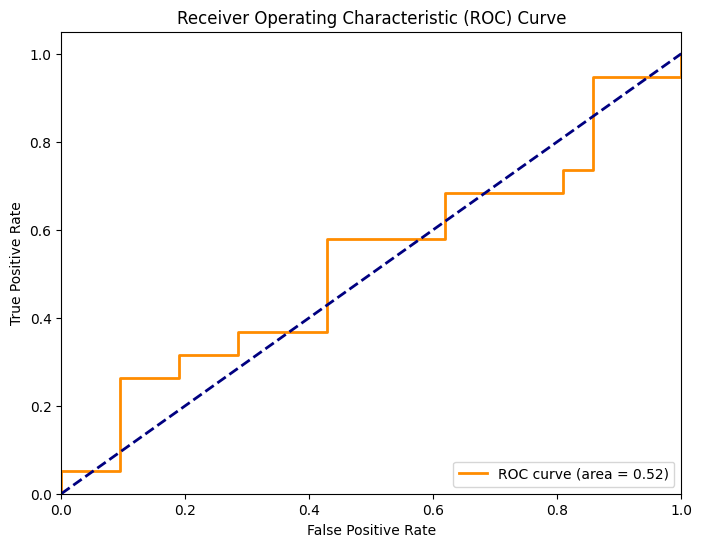

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
print(f"AUC Score: {roc_auc}")
plt.show()

## Summary:

### Q&A
The main goal of this analysis was to build a logistic regression model to predict a customer's gender based on their annual income and spending score. The following questions were answered:
- How well does a logistic regression model perform on this task?
- What is the accuracy of the model?
- What is the AUC score of the model?

The model achieved an accuracy of 52.5% and an AUC score of 0.52. These results indicate that the model's performance is only slightly better than random guessing.

### Data Analysis Key Findings
* The logistic regression model achieved an accuracy of 52.5% on the test set.
* The model's ability to classify genders is poor, as evidenced by the low precision and recall scores for the "Male" class (0.50 and 0.05 respectively).
* The AUC score of 0.52 is very close to 0.5, which represents a random classifier. This suggests that the model has very little discriminative power.
* The confusion matrix revealed that the model correctly classified 20 out of 21 "Female" instances but only 1 out of 19 "Male" instances in the test set.

### Insights or Next Steps
* The features 'Annual Income (k\$)' and 'Spending Score (1-100)' are not sufficient to build a reliable model for predicting gender. Exploring other features or collecting more relevant data could improve model performance.
* Given the poor performance of the logistic regression model, it would be beneficial to try more complex models, such as decision trees, random forests, or gradient boosting, to see if they can capture any non-linear relationships in the data.
